# Make cross-correlation plots

In [1]:
#Import functions
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import corrplot

In [4]:
#Define files which cross-correlation plots will be made for 
#(standard setup is one plot for degree=3 and one for degree=4 but you can always comment out stuff to make only a
#single plot or to compare different things)
#When you define two files, they will be put on the same color scale in the plots
file='data/sph_harmonic_coefficients_full_samples/mystery1_eigen2/spherearray_deg_3.npz'
corrcoeffs=corrplot.corrplot(file)
file2='data/sph_harmonic_coefficients_full_samples/mystery1_eigen2/spherearray_deg_4.npz'
corrcoeffs2=corrplot.corrplot(file2)

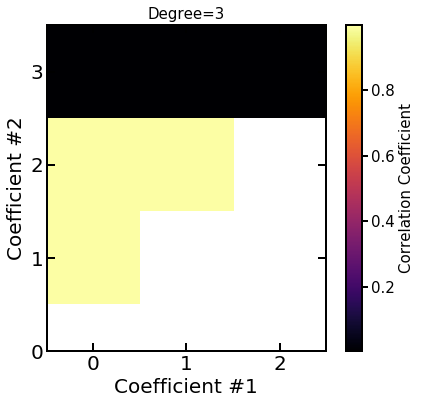

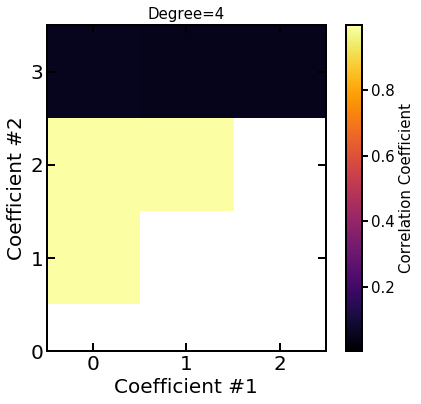

In [5]:
#Making the plot
vmax=np.max((np.max(corrcoeffs),np.max(corrcoeffs2))) 
vmin=np.min((np.min(abs(corrcoeffs)),np.min(abs(corrcoeffs2))))-0.0001

corrcoeffs[corrcoeffs==-1.]=0.
corrcoeffs2[corrcoeffs2==-1.]=0.

palette=plt.cm.inferno
palette.set_under(color='w')

rc('axes',linewidth=2)
plt.figure(figsize=(7,6))
plt.title('Degree=3',fontsize=15)
plt.imshow(abs(corrcoeffs),cmap=palette,vmin=vmin,vmax=vmax,origin='lower')
c=plt.colorbar()
c.ax.tick_params(labelsize=15,width=2,length=6)
c.set_label('Correlation Coefficient',fontsize=15)
plt.xlim((-0.5,np.shape(corrcoeffs)[0]-1.5))
plt.ylim((0.5,np.shape(corrcoeffs)[0]-0.5))
plt.xlabel('Coefficient #1',fontsize=20)
plt.ylabel('Coefficient #2',fontsize=20)
plt.xticks([0,1,2],['0','1','2'])    #unfortunately I couldn't find a shortcut to make the ticks the same length as the cross-correlation plots, so you might have to edit this to get the axes looking nice
plt.yticks([0,1,2,3],['0','1','2','3'])
plt.tick_params(labelsize=20,axis="both",top=True,right=True,width=2,length=8,direction='in')
plt.show()

plt.figure(figsize=(7,6))
plt.title('Degree=4',fontsize=15)
plt.imshow(abs(corrcoeffs2),cmap=palette,vmin=vmin,vmax=vmax,origin='lower')
c=plt.colorbar()
c.ax.tick_params(labelsize=15,width=2,length=6)
c.set_label('Correlation Coefficient',fontsize=15)
plt.xlim((-0.5,np.shape(corrcoeffs2)[0]-1.5))
plt.ylim((0.5,np.shape(corrcoeffs2)[0]-0.5))
plt.xlabel('Coefficient #1',fontsize=20)
plt.ylabel('Coefficient #2',fontsize=20)
plt.xticks([0,1,2],['0','1','2'])   #unfortunately I couldn't find a shortcut to make the ticks the same length as the cross-correlation plots, so you might have to edit this to get the axes looking nice
plt.yticks([0,1,2,3],['0','1','2','3'])
plt.tick_params(labelsize=20,axis="both",top=True,right=True,width=2,length=8,direction='in')
plt.show()